In [65]:
from newsapi import NewsApiClient
from PIL import Image
import requests
import matplotlib.pyplot as plt
from collections import Counter

# Init
newsapi = NewsApiClient(api_key='TODO')

In [121]:
pick = {'Argentina':'ar',
       'Australia': 'au',
       'Austria': 'at',
       'Belgium': 'be',
       'Brazil': 'br',
       'Bulgaria': 'bg',
       'Canada': 'ca',
       'China': 'cn',
       'Colombia': 'co',
       'Cuba': 'cu',
       'Czech Republic': 'cz',
       'Egypt': 'eg',
       'France':'fr',
       'Germany':'de',
       'Greece':'gr',
       'Hong Kong':'hk',
       'Hungary':'hu',
       'India':'in',
       'Indonesia':'id',
       'Ireland':'ie',
       'Israel':'il',
       'Italy':'it',
       'Japan':'jp',
       'Latvia':'lv',
       'Lithuania':'lt',
       'Malaysia':'my',
       'Mexico':'mx',
       'Morocco':'ma',
       'Netherlands':'nl',
       'New Zealand':'nz',
       'Nigeria':'ng',
       'Norway':'no',
       'Philippines':'ph',
       'Poland':'pl',
       'Portugal':'pt',
       'Romania':'ro',
       'Russia':'ru',
       'Saudi Arabia':'sa',
       'Serbia': 'rs',
       'Singapore':'sg',
       'Slovakia':'sk',
       'Slovenia':'si',
       'South Africa':'za',
       'South Korea':'kr',
       'Sweden':'se',
       'Switzerland':'ch',
       'Taiwan':'tw',
       'Thailand':'th',
       'Turkey':'tr',
       'UAE':'ae',
       'Ukraine':'ua',
       'United Kingdom':'gb',
       'United States':'us',
       'Venezuela':'ve'}

In [124]:
# /v2/top-headlines
top_headlines = newsapi.get_top_headlines(q='coronavirus',
                                          language='en',
                                         country=pick['United States'])

In [125]:
if len(top_headlines['articles']) > 5:
    max_articles = 5
else:
    max_articles = len(top_headlines['articles'])
sent = []
for i in range(max_articles):
    tit = top_headlines['articles'][i]['title']
    desc = top_headlines['articles'][i]['description']
    url = top_headlines['articles'][i]['urlToImage']
    src = top_headlines['articles'][i]['source']['name']
    auth = top_headlines['articles'][i]['author']
    link = top_headlines['articles'][i]['url']
    sent.append(desc)

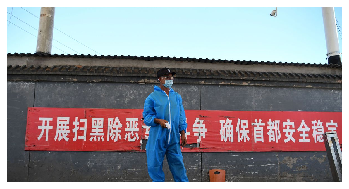

In [126]:
response = requests.get(url, stream=True)
img = Image.open(response.raw)

plt.imshow(img)
plt.axis('off')
plt.show()

In [111]:
word_list = [item for sublist in [i.split() for i in sent] for item in sublist]

from nltk.corpus import stopwords

filtered_words = [word for word in word_list if word not in stopwords.words('english')]

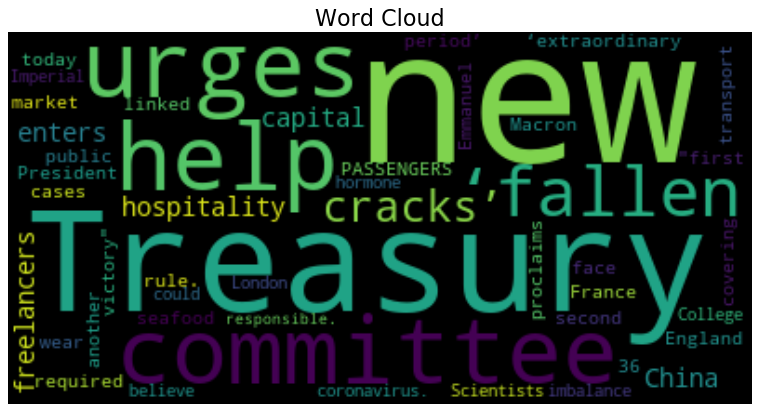

In [112]:
from wordcloud import WordCloud

d = {}
for x, a in zip(list(dict(Counter(filtered_words)).values()),
                list(dict(Counter(filtered_words)).keys())):
    d[a] = x
    
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w',
           edgecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud", fontsize=20)
plt.show()

In [113]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
sent_list = ' '.join(sent)

vs = analyzer.polarity_scores(sent_list)
vs['compound']

0.872

In [137]:
a = '//bucket2.glanacion.com/anexos/fotos/74/3190574.jpg'
b = 'http:////bucket2.glanacion.com/anexos/fotos/74/3190574.jpg'
if a[0:7] != b[0:7]:
    a =  b[0:7] + a[2:]
    
print(a)

http://bucket2.glanacion.com/anexos/fotos/74/3190574.jpg


In [147]:
b = 'http://'
c = 'https://'
url = top_headlines['articles'][0]['urlToImage']
print(url)
# if ((url[0:7] != b[0:7]) or (url[0:8] != c[0:8])):
if url[:4] != c[:4]:
    url = c[0:7] + url[2:]
print(url)

https://static01.nyt.com/images/2020/06/11/science/00VIRUS-VAX3/00VIRUS-VAX3-facebookJumbo.jpg
https://static01.nyt.com/images/2020/06/11/science/00VIRUS-VAX3/00VIRUS-VAX3-facebookJumbo.jpg


In [ ]:
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)
plt.axis('off')